<a href="https://colab.research.google.com/github/Jayjake1/DataAnalysis/blob/main/EDA_using_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Tumor Diagnosis (Part 1): Exploratory Data Analysis</h1>


### About dataset:
The Breast Cancer Diagnostic data is available on the UCI Machine Learning Repository. This database is also available through the UW CS ftp server.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

###  Attribute Information:

- ID number
- Diagnosis (M = malignant, B = benign) 3-32)
Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

## Task 1: Loading Libraries and Data


In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

In [30]:
data = pd.read_csv('/content/drive/MyDrive/Data Analysis Projects/data.csv')


### Exploratory Data Analysis



In [31]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


- Id has to drop or set as index
- diagnosis is target variable (Malignant/Benign)
- dropping unnamed 32 column

In [32]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

2. Separting target from features

In [33]:
# target 
y = data.diagnosis

In [34]:
data=data.drop(['id','Unnamed: 32','diagnosis'],axis=1)
data.head()
x= data  # fail safe

3. Plotting Diagnosis Distribution

Number of Benign tumors:  357
Number of Malignant tumors:  212


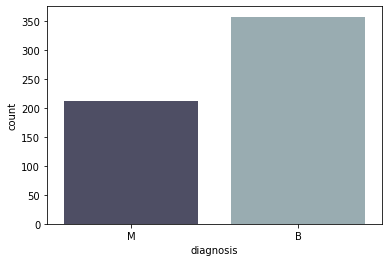

In [35]:
ax = sns.countplot(y, label = "Count",palette='bone')
B, M = y.value_counts()
print('Number of Benign tumors: ', B)
print('Number of Malignant tumors: ', M)

In [36]:
data.describe()  # using variables

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Data Visualization

- Visualising standardized data

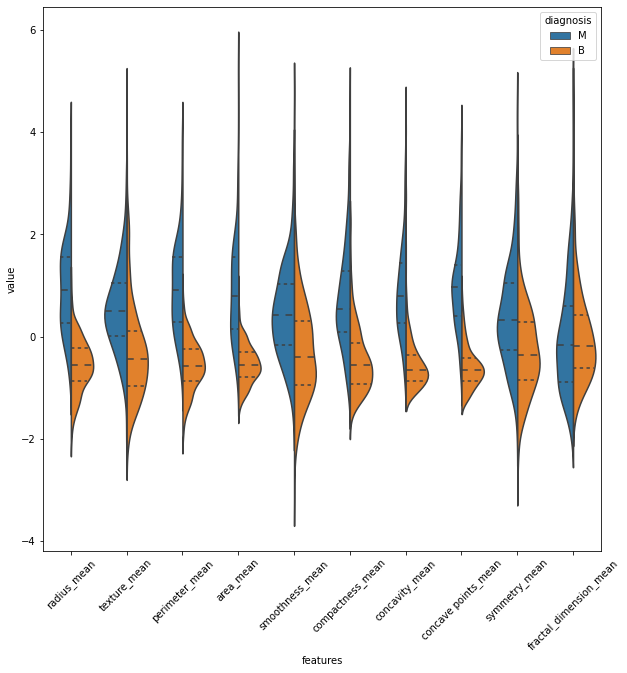

In [37]:
data_std = (data-data.mean())/data.std()

data = pd.concat([y, data_std.iloc[:, 0:10]], axis=1)
#all rows, but columns 0 to 9 so it doesn't become cluttered
#axis = 1 because columns

#If we try to get plot now, we'll get an error bec. data is in long format
# we need to unpivot it to wide format, we can use melt method
data = pd.melt(data, id_vars = 'diagnosis',
              var_name = 'features',
              value_name = 'value')
plt.figure(figsize=(10,10))

sns.violinplot(x='features',
               y='value',
               hue='diagnosis',    #hue will color according to diagnosis B or M
               data=data,
               split=True,
               inner='quart',
              )

plt.xticks(rotation=45);

#Beacuse 10 features, so alot of names, so we want feature names to be rotated to be easier to read

When we check the above diagram, for example:

Texture_Mean, it's median is far for B and M, so would indicate it as good feature for differentiation. However, if you look at the last one, the median doesn't look like it is well separated, so might mean it will not give good prediction.

## 5. Violin plots and Box plots

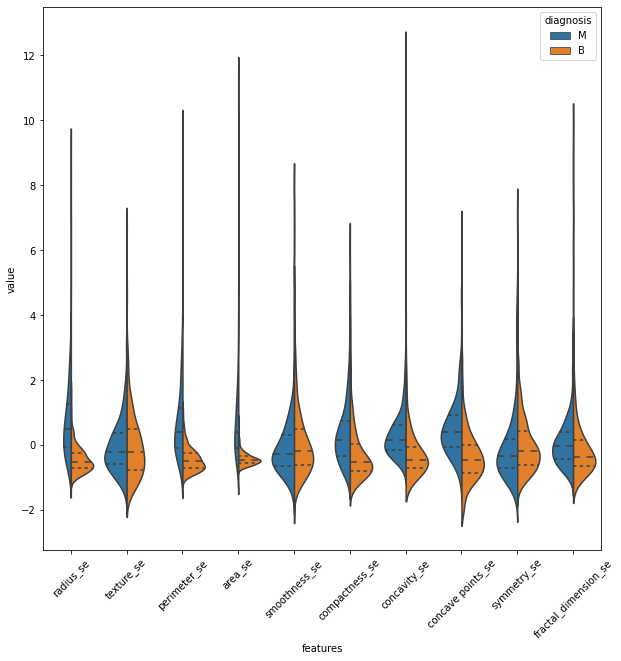

In [38]:
#Now we will try to make comparison between features 10th to 19th
data = pd.concat([y, data_std.iloc[:, 10:20]], axis=1)

data = pd.melt(data, id_vars = 'diagnosis',
              var_name = 'features',
              value_name = 'value')

plt.figure(figsize=(10,10))

sns.violinplot(x='features',
               y='value',
               hue='diagnosis',    #hue will color according to diagnosis B or M
               data=data,
               split=True,
               inner='quart',
              )

plt.xticks(rotation=45);

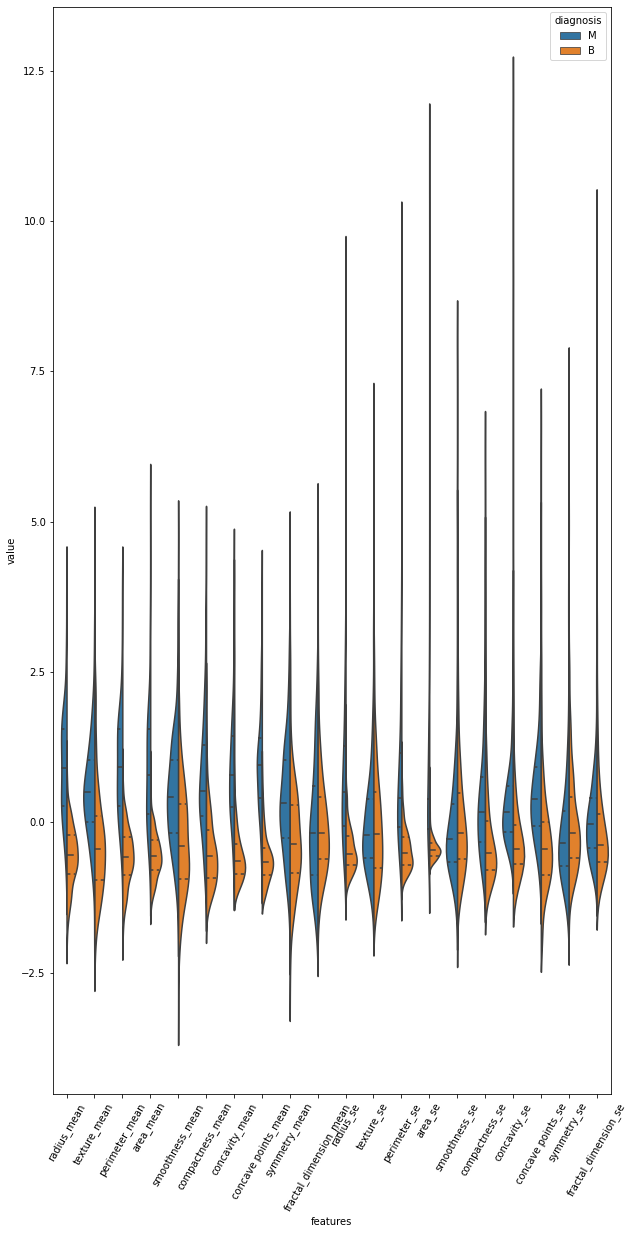

In [39]:
#Now we will try to make comparison between more feature 0 to 19th
data = pd.concat([y, data_std.iloc[:, 0:20]], axis=1)

data = pd.melt(data, id_vars = 'diagnosis',
              var_name = 'features',
              value_name = 'value')

#We need to decrease the figure size
plt.figure(figsize=(10,20))

sns.violinplot(x='features',
               y='value',
               hue='diagnosis', 
               data=data,
               split=True,
               inner='quart',
              )

plt.xticks(rotation=60);

As seen, this is all cluttered, so this is NOT best way to visualize your data and make interpretations

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

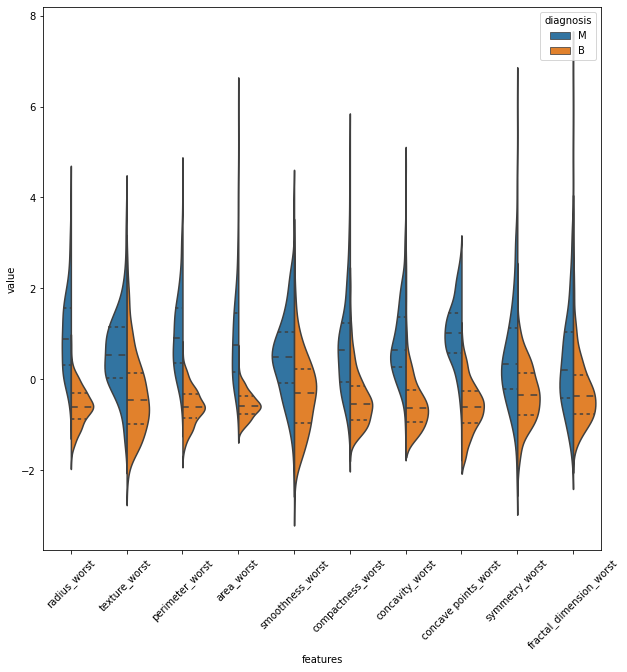

In [40]:
#Now we will return to normal 10 features and compare between features 20th to 30th
data = pd.concat([y, data_std.iloc[:, 20:30]], axis=1)

data = pd.melt(data, id_vars = 'diagnosis',
              var_name = 'features',
              value_name = 'value')

plt.figure(figsize=(10,10))

sns.violinplot(x='features',
               y='value',
               hue='diagnosis',    #hue will color according to diagnosis B or M
               data=data,
               split=True,
               inner='quart',
              )

plt.xticks(rotation=45)

Features: compactness worst, concativity worst and concave points worst

look similar so we might need to explore if they are related to each other and remove one of them. Because they might negatively impact our predictive classifier.(mutli collinearity)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

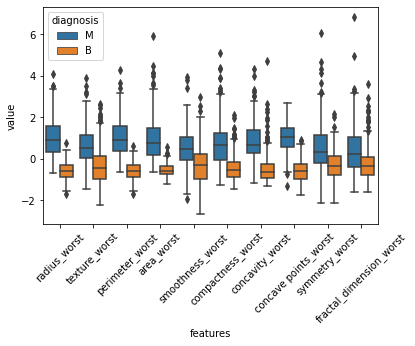

In [41]:
sns.boxplot(x='features',
            y='value',
            hue = 'diagnosis',
            data=data
           )

plt.xticks(rotation=45)

This boxplot clearly shows the outliers in each feature in my data.

## 6: Using Joint Plots for Feature Comparison

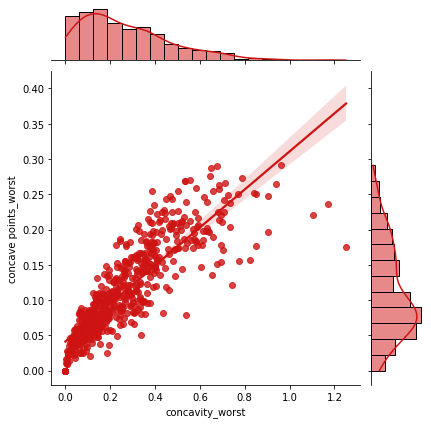

In [45]:
sns.jointplot(x.loc[:, 'concavity_worst'],    #we need all rows of this column
            x.loc[:, 'concave points_worst'],
            # kind='scatter' # gives scatter plot
            kind='reg',    #this focuses on regression type plots
            color='#ce1413'  #you can check this in the seaborn doumentation
            )

👆🏼 these 2 variables/ features are highly correlated

## 7: Observing the Distribution of Values and their Variance with Swarm Plots

swarm plots can show you clearly the variance between the features of your target.

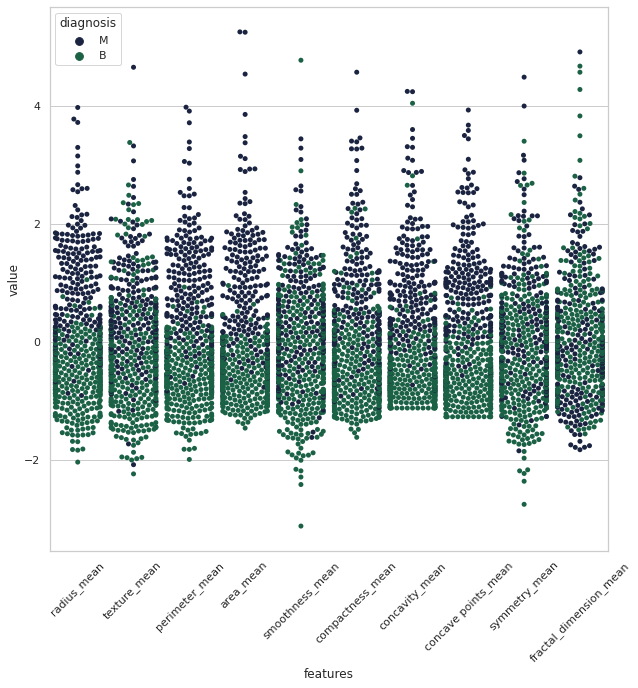

In [50]:
sns.set(style='whitegrid',
       palette='cubehelix',   # 'muted for dull colors'
       )

data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 0:10]], axis=1)
#all rows, but columns 0 to 9 so it doesn't become cluttered
#axis = 1 because columns

#If we try to get plot now, we'll get an error bec. data is in long format
# we need to unpivot it to wide format, we can use melt method

data = pd.melt(data, id_vars = 'diagnosis',
              var_name = 'features',
              value_name = 'value')

plt.figure(figsize=(10,10))

sns.swarmplot(x='features',
               y='value',
               hue='diagnosis',    #hue will color according to diagnosis B or M
               data=data
              #we removed the split and hue which only work with violin plots
              )

plt.xticks(rotation=45);

#Beacuse 10 features, so alot of names, so we want feature names to be rotated to be easier to read

In [48]:
""" supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 
'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r',
 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2',
  'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 
  'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds',
   'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 
   'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r',
    'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
    'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 
    'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
    'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r',
 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'm... """

" supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', \n'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r',\n 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2',\n  'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', \n  'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds',\n   'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', \n   'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r',\n    'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', \n    'coolwarm_r', 'copper', 'cop

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

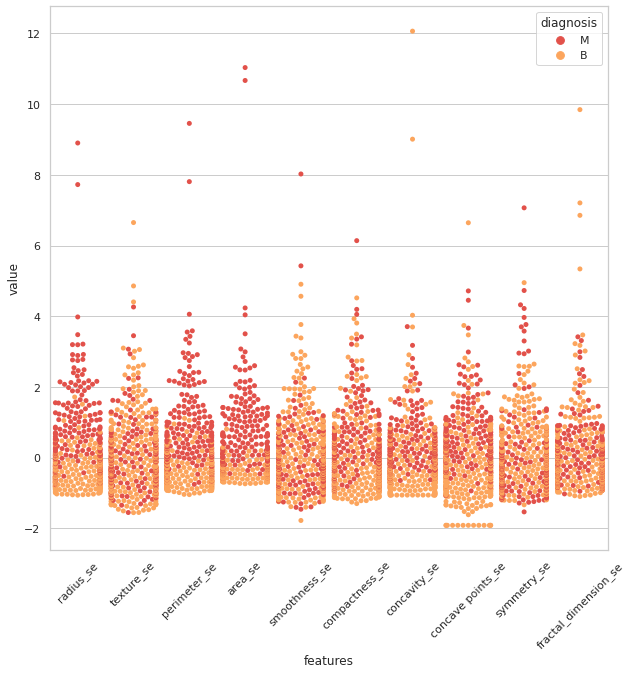

In [59]:
# getting next 10 features
sns.set(style='whitegrid',palette='Spectral' )
data = x
data = (data-data.mean())/data.std()
data = pd.concat([y,data_std.iloc[:,10:20]],axis=1)
#all rows, but columns 10 to 19 so it doesn't become cluttered
#axis = 1 because columns

#If we try to get plot now, we'll get an error bec. data is in long format
# we need to unpivot it to wide format, we can use melt method
data = pd.melt(data, id_vars='diagnosis',
               var_name = 'features',
               value_name='value')

plt.figure(figsize=(10,10))
sns.swarmplot(x='features',y='value',
               hue='diagnosis',data = data)

plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

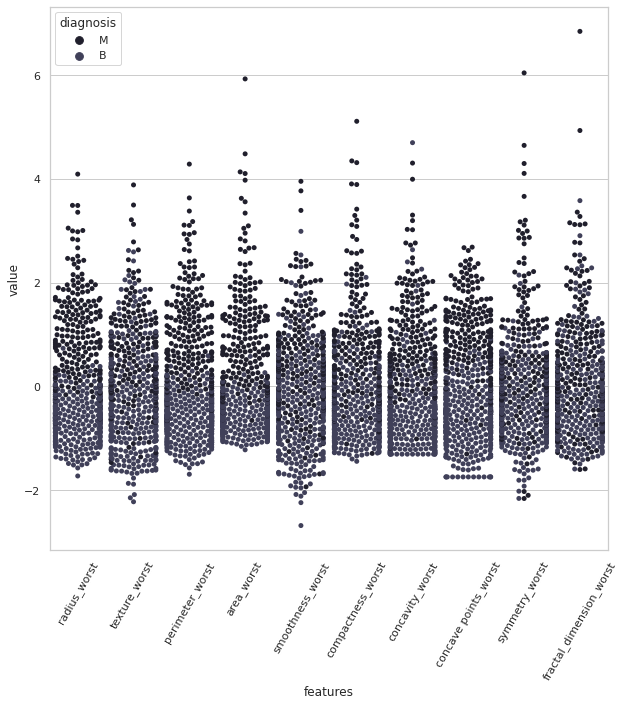

In [62]:
sns.set(style='whitegrid',palette='bone')
data = x
data = (data-data.mean())/data.std()
data = pd.concat([y,data_std.iloc[:,20:]],axis=1)

#If we try to get plot now, we'll get an error bec. data is in long format
# we need to unpivot it to wide format, we can use melt method
data = pd.melt(data, id_vars='diagnosis',
               var_name = 'features',
               value_name='value')

plt.figure(figsize=(10,10))

sns.swarmplot(x='features',y='value',
              hue='diagnosis',data = data)

plt.xticks(rotation=60)


As observed in smoothness worst feature, this is bad feature to use because there is a mixture and not well separated.

On the contrary, perimeter worst or area worst have good predictive power.

Ok, all this time we were seeing the correlations in batches, but now we want to see the correlation between all the features so we will make a correlation matrix with heat map built on top of it.

## 8: Observing all Pair-wise Correlations

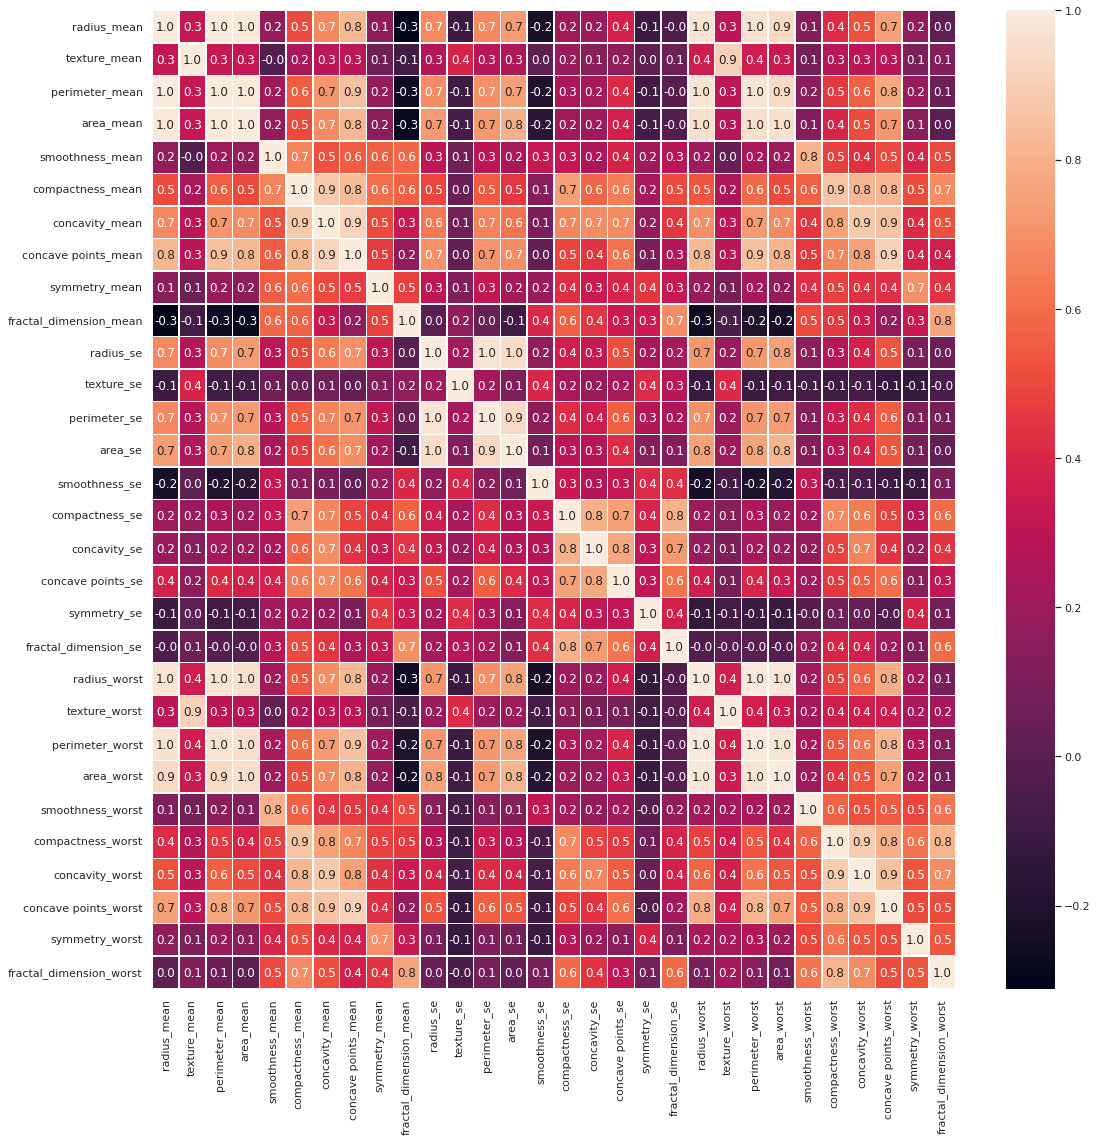

In [63]:
f, ax = plt.subplots(figsize=(18,18))    #30 features
sns.heatmap(x.corr(),
            annot=True,    #To see pearson-correlation annotation
            linewidth=.5,    
            #small value to be able to see value instead of being shadowed by the lines
            fmt='.1f',   #1 decimal place
            ax = ax     #axis variable
           );